# Basic Acoustics 
##### Udacity's VUI Concentration

## Speech signals

Speech propagates as a longitudinal wave in a medium, such as air or water. The speed of propagation depends on the density of the medium. The simplest form of sound that we can describe is called a sinusoid. This waveform corresponds to a pure tone and as we will see later forms the basis for all more complex sounds. Since a sinusoid has such a pure shape it is a useful starting point when describing the properties of sound waves.

Three kinds of measurement can be taken from a sinusoid:

* **Amplitude:** the size of the displacement of the sinusoid above and below the mid line. This corresponds to the energy in the sound wave and hence how loud it appears to be. There are many ways of measuring amplitude; since it relates to the size of the pressure variations in the air it can be measured in units of pressure. More often we talk about deciBels (dB) which measure amplitude on a logarithmic scale relative to a standard sound. The dB scale is useful since it maps directly to the way that humans percieve loudness.

* **Frequency:** the number of cycles made by the sinusoid each second. A cycle consists of an oscilation from the mid line to the maximum, down to the minimum and back to the midline. Frequency is measured in cycles per second or Hertz (Hz). The period is the inverse of this -- the time taken for one cycle. Changes in frequency are percieved as changes in the pitch of a sound (although pitch has a more complicated perceptual definition so the two quanitities are not the same).

* **Phase:** measures the position of the starting point of the sinusoid. Those starting at the maximum have a phase of zero while those starting at the minimum have a phase of π radians. Phase is best explained with reference to a rotating wheel. The phase of a sinusoid cannot be percieved but we can detect relative changes in phase between two signals, in fact this forms the basis of binaural hearing as the brain works out the location of a sound based on the different phases heard at the two ears. Ex. Try to listen Bohemian Rapsody using the right and then the left earplug.

[http://web.science.mq.edu.au/~cassidy/comp449/html/ch03.html]

### A sine function

\begin{equation*}
\ y(t) = A * \sin(2 \pi  f  t + \varphi) = A \sin(\omega  t + \varphi)
\end{equation*}

where:

* A = the amplitude, the peak deviation of the function from zero.
* f = the ordinary frequency, the number of oscillations (cycles) that occur each second of time.
* ω = 2πf, the angular frequency, the rate of change of the function argument in units of radians per second

\varphi  = the phase, specifies (in radians) where in its cycle the oscillation is at t = 0.
When \varphi  is non-zero, the entire waveform appears to be shifted in time by the amount \varphi /ω seconds. A negative value represents a delay, and a positive value represents an advance.

### Adding signals


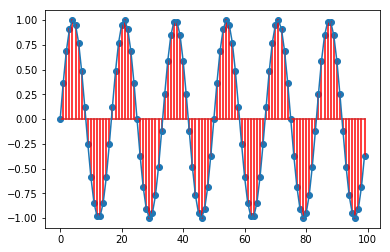

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 

fs = 100 # number of samples
f = 6 # the frequency of the signal

x = np.arange(fs) # points on x axis for plotting
# compute the value (amplitude) of the sin wave at the for each sample
y = [ np.sin(2*np.pi*f * (i/fs)) for i in x]

% matplotlib inline 
plt.stem(x,y, 'r', ) # show points
graph2 = plt.plot(x,y)


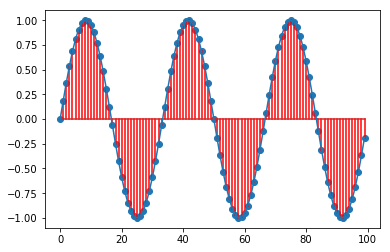

In [2]:
fs = 100 # number of samples
f = 3 # the frequency of the signal

x = np.arange(fs) # points on x axis for plotting
# compute the value (amplitude) of the sin wave at the for each sample
y = [ np.sin(2*np.pi*f * (i/fs)) for i in x]

% matplotlib inline 
plt.stem(x,y, 'r', ) # show points
graph2 = plt.plot(x,y)


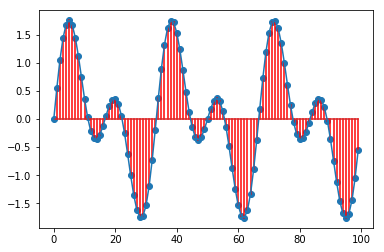

In [3]:
fs = 100 # number of samples
f = 6 # the frequency of the signal

x = np.arange(fs) # points on x axis for plotting
# compute the value (amplitude) of the sin wave at the for each sample
y = [(np.sin(2*np.pi*f * (i/fs)) + (np.sin(2*np.pi*f/2 * (i/fs)))) for i in x]

% matplotlib inline
plt.stem(x,y, 'r', ) # show points
plt.plot(x,y)

## Fourier Theory

The Fourier Transform and the associated Fourier series is one of the most important mathematical tools in physics. Physicist Lord Kelvin remarked in 1867:

>“Fourier’s theorem is not only one of the most beautiful results of modern analysis, but it may be said to furnish an indispensable instrument in the treatment of nearly every recondite question in modern physics.”

The Fourier Transform deals with time based waves – and these are one of the fundamental building blocks of the natural world. Sound, light, gravity, radio signals, Earthquakes and digital compression are just some of the phenomena that can be understood through waves. It’s not an exaggeration therefore to see the study of waves as one of the most important applications of mathematics in our modern life.

[https://ibmathsresources.com/2014/08/14/fourier-transforms-the-most-important-tool-in-mathematics/]


Fourier theory says that any complex periodic waveform can be decomposed into a set of sinusoids with different amplitudes, frequencies and phases. The process of doing this is called Fourier Analysis and the result is a set of amplitudes, phasesand frequencies for each of the sinusoids that makes up the complex waveform. Adding these sinusoids together again will reproduce exactly the original waveform. A plot of the frequency or phase of a sinusoid against amplitude is called a spectrum. 

Any periodic signal shows a pattern of repetition in the time waveform which corresponds to the primary rate of vibration of the signal, known as the fundamental frequency. This corresponds to the lowest major frequency component in the signal and, in the case of voiced speech, equates to the frequency of vibration of the vocal folds. A vibration source like the vocal folds also produces what are called harmonics which are oscillations at multiples of the fundamental frequency. For example, a 100Hz source vibration will give rise to harmonics at 200Hz, 300Hz, 400Hz etc. In the spectrum of such a signal, the harmonics show up as spikes at these frequencies.

The fundamental frequency can be measured from a speech waveform by looking for the period of oscillation of the signal around the zero axis. Estimates can also be made from the spectrum since it shows a large peak at this frequency and at each multiple due to the harmonics. Measurements can be made of the frequency of the major peak or of the distance between harmonic peaks.

### Spectrograms and FFT

A spectrum shows the freqency content of a short section of a waveform but it we want to see how the spectrum changes with time through a section of speech we need a different kind of display. A standard way of displaying this information is a spectrogram; this is a two dimensional plot of frequency against time where the amplitude at each frequency is represented by the darkness of the corresponding point in the display.

<img src= http://web.science.mq.edu.au/~cassidy/comp449/html/wideband.gif />

An FFT, or Fast Fourier Transform, is an efficient implementation of a Discrete Fourier Transform. The algorithm transforms a sum of sinusoidal signals into into its pure frequency components. In the following quiz, we will demonstrate adding sinusoidal waves together and then deconstructing them back into their component frequencies.

* **choose_frequencies** choose three frequencies in a range from 1 to 50. These are the number of full cycles each sinusoidal wave will have in one "time unit". Running the definition will produce a visual of the three chosen frequencies as well as a new wave that is the sum of the three. This is similar to an acoustic signal, which is the sum of many sinusoidal waves. The waves may have different phases and amplitudes as well. Here's an example of a choice of (3, 8, 1) for the three frequencies.

* **add_the_waves** second definition is where the waves are created. For this demonstration, we will only create three. This has been done for you with the utils.make_waves function - take a look at to understand how it works. You just need to add them together. This simulates an audio signal, which is really just sinusoidal waves added together. In audio signals, the sinusoidal waves are created by sound vibrations and may be at varying amplitudes and phase as well as frequency. To simulate this variety, the utils.make_waves function provides random amplitudes and phase shifts.

* **demo_fft** An FFT can be created with a variety of library functions including scipy.fftpack.fft , which we'll use in this quiz. Read the linked reference to understand how to use it in code.

This FFT algorithm will create both positive and negative values, but we'll just display the positive ones. When you're done, you should see something like the following, showing peaks at the three frequency values originally provided!

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def sinusoid(freq):
    """
    return a sinusoidal of random amplitude and phase for a given frequency
    :param freq: 
    :return: 
    """
    phase = np.random.random()
    amplitude = 2 * (np.random.random_integers(1, 10))
    return amplitude * np.cos(2 * np.pi * freq - phase)


def get_wave_timing(num_samples=500, range_of_time = 5.0):
    """
    provide an array of time values of size num_samples spread evenly over range_of_time
    :param num_samples: int 
    :param range_of_time: float
    :return: int, float, np.array
    """
    # sample spacing
    spacing = range_of_time / num_samples
    # array for time samples
    t = np.linspace(0.0, range_of_time, num_samples)
    return num_samples, spacing, t


def make_waves(t, freqs):
    """
    convert three frequencies into arrays of discrete values representing sinusoidal waves
    :param freqs: [float, float, float]
    :return: [np.array, np.array, np.array]
    """
    w0 = sinusoid(t * freqs[0])
    w1 = sinusoid(t * freqs[1])
    w2 = sinusoid(t * freqs[2])
    return w0, w1, w2


def display_sinusoids(time_array, f1, f2, f3, sum):
    # plot three frequencies with random phase shifts on y axis
    plt.figure()
    fig, ax = plt.subplots(4, 1)
    # plt.subplot(411)  # 3 rows, 1 column, fignum 1
    ax[0].plot(time_array, f1)
    ax[0].set_title('1st frequency component')

    # plt.subplot(412)  # 3 rows, 1 column, fignum 2
    ax[1].plot(time_array, f2)
    ax[1].set_title('2nd frequency component')

    # plt.subplot(413)  # 3 rows, 1 column, fignum 3
    ax[2].plot(time_array, f3)
    ax[2].set_title('3rd frequency component')

    # sum
    # plt.subplot(414)  # 3 rows, 1 column, fignum 4
    ax[3].plot(time_array, sum, 'r')
    ax[3].set_title('Sum of components')
    ax[3].set_ylabel('amplitude')
    ax[3].set_xlabel('time')

    # adjust format of display to make room for titles
    plt.subplots_adjust(
         top=0.94,
         bottom=0.11,
         left=0.11,
         right=0.97,
         hspace=0.65,
         wspace=0.2
    )
    plt.show()
    return fig


def display_fft(xf, yf):
    num_samples = np.shape(yf)[0]
    fig, ax = plt.subplots()
    ax.plot(xf, 2.0 / num_samples * np.abs(yf[:num_samples]))
    plt.title('Fast Fourier Transform')
    plt.xlabel('frequency')
    plt.ylabel('amplitude')
    return fig

In [5]:
import numpy as np
import scipy.fftpack
# import utils as utils
import random

def choose_frequencies():
    """
    # provide three frequencies in a range between 1 and 50    
    :return: [int, int, int]
    """
    
    freq1 = random.randint(1, 51)
    freq2 = random.randint(1, 51)
    freq3 = random.randint(1, 51)
   
    return [freq1, freq2, freq3]


def add_the_waves(freqs):
    """
    create three sinusoidal waves and one wave that is the sum of the three
    :param freqs: [int, int, int]
    :return: [np.array, np.array, np.array, np.array]
        representing wave1, wave2, wave3, sum of waves
        each array contains 500(by default) discrete values for plotting a sinusoidal
    """
    _, _, t = get_wave_timing()
    w1, w2, w3 = make_waves(t, freqs)

    sum_waves = w1+w2+w3

    return [w1, w2, w3, sum_waves], t


def demo_fft(sum_waves):
    num_samples, spacing, _ = get_wave_timing()

    # Create a Fast Fourier Transform of the waveform using scipy.fftpack.fft named 'y_fft'
    y_fft = scipy.fftpack.fft(sum_waves)
    x_fft = np.linspace(0.0, 1.0/spacing, num_samples)
    
    return x_fft, y_fft

[6, 51, 18]


/anaconda/envs/dog-gpu-project/lib/python3.5/site-packages/ipykernel/__main__.py:11: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead


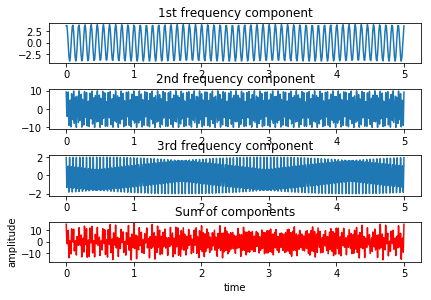

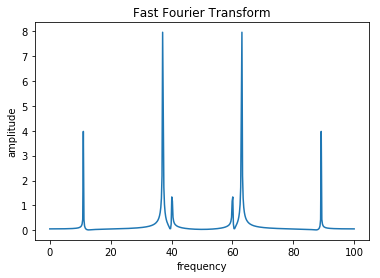

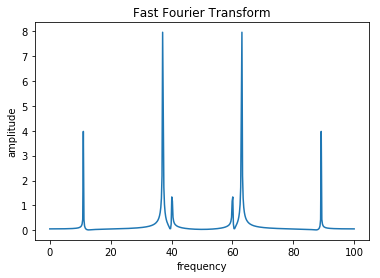

In [6]:
print(choose_frequencies())
waves_list, t = add_the_waves(choose_frequencies())
display_sinusoids(t, waves_list[0], waves_list[1], waves_list[2], waves_list[3])
x_fft, y_fft = demo_fft(waves_list[3])
display_fft(x_fft, y_fft)

## Feature extraction with MFCC (Mel Frequency Cepstra Coeff)

On the previous section we have seen that we can decompose the audio signal into different sine waves, and get a vectorial representation afterwards using FFT. However, we still have unnecessary information within the audio signal like background noise and pitches that the human ear cannot sense. This section is about: 

> * To reduce dimensionality of data
> * To reduce noise in data

### Mel Scale (1937)

Mel Scale was created in 1937 to illustrate that: we are more able to distinguish among low pitches rather than high pitches, thus, above a set threshold, it may not necessary to include that frequencies.  

### Articulation of sound: Cepstral analysis


#### Why? Motivation

A signal comming out from a system is due to the input excitation and also the response of the system. From the signal processing point of view, the output of a system can be treated as the convolution of the input excitation with the system response. At times, we need each of the components separately for study and/or processing. The process of separating the two components is termed as deconvolution.

#### How? Cepstrum Analysis, The Math

The source/filter model holds that the "source" of voices speech is dependent upon the vibrations initiated in the vocal box, and is unique to the speaker, while the "filter" is the articulation of the words in the forward part of the voice tract. The two can be separated through Cepstrum Analysis. We are more interesting in preserving the shape of sound made by the vocal tract rather than source which is unique for every individual since is the result of the vibrations made by the vocal cords. 

According to the source filter theory of speech production, voiced sounds are produced by exciting the time varying system characteristics with **periodic impulse sequence** (n) and unvoiced sounds are produced by exciting the time varying system with a random noise sequence. The resulting speech can be considered as the convolution of respective excitation sequence and vocal tract filter characteristics. If e(n) is the excitation sequence and h(n) is the vocal tract filter sequence, then the speech sequence s(n) can be expressed as follows:



\begin{equation*}
\ s(n)=e(n)×h(n)            .....................................(1)
\end{equation*}




The speech sequence has to be deconvolved into the excitation and vocal tract components in the TIME domain. For this, multiplication of the two components in the frequency domain has to be converted to a linear combination of the two components. For this purpose cepstral analysis is used for transforming the multiplied source and system components in the frequency domain to linear combination of the two components in the cepstral domain.




\begin{equation*}
\ S(\omega) = E(\omega) \cdot  H(\omega)             ....................................(2)
\end{equation*}




This signal can be converted to the frequency domain through a discrete Fourier transform, or DFT (can use the FFT algorithm):



\begin{equation*}
\ |S(\omega)| = |E(\omega)| \cdot |H(\omega)|            .................................(3)
\end{equation*}



Take the log to get a linear combination of both: 



\begin{equation*}
\ log∣S(ω)∣=log∣E(ω)∣+log∣H(ω)∣                   .................(4)
\end{equation*}




Here's where it gets a bit tricky. By taking the inverse discrete Fourier transform, or IDFT, the signal can be split into the linearly combined log spectra of excitation and vocal tract system components giving cepstrum c(n) as a result. 

It should be noted that IDFT of linear spectra transforms back to the time domain, but **the IDFT of log spectra transforms to quefrency domain or the cepstral domain which is similar to time domain**. This is mathematically explained in the equation above. In the quefrency domain the vocal tract components are represented by the slowly varying components concentrated near the lower quefrency region and excitation components are represented by the fast varying components at the higher quefrency region. [http://iitg.vlab.co.in/?sub=59&brch=164&sim=615&cnt=1]

Here's the final equation:

\begin{equation*}
c(n) = IDFT(\log |S(\omega)|) = IDFT(\log |E(\omega)| +  \log|H(\omega)|) ....(5)
\end{equation*}

### Computation of Cepstrum

<img src="cepstrum_computation.png" />


* s(n) is the voiced frame considered and 
* x(n) is the windowed frame. Here s(n) multiplied by a hamming window to get x(n) 
* |x(ω)| represent the spectrum of the windowed sequence x(n) 

* As the spectrum of the given frame is symmetric, only one half of the spectral components is plotted (second and third graph of the image below). 

* The log|x(ω)| represents the log magnitude spectrum obtained by taking logarithm of the |x(ω)|

* c(n) shows the computed spectrum for the voiced frame s(n). The obtained cepstrum contains vocal tract components which are linearly combined according Eqn.(5). As the cepstrum is derived from the log magnitude of the linear spectrum, it is also symmetrical in the quefrency domain. Here also only one symmetric part of the cepstrum is used for plotting. 

<img src="speech_and_cepstrum.png" />

[http://iitg.vlab.co.in/?sub=59&brch=164&sim=615&cnt=1]

###  Putting it altogether: Mel Frequency Cepstral Coefficients (MFCC)

Mel Frequency Cepstrum Coefficient Analysis is the reduction of an audio signal to essential speech component features using both mel frequency analysis and cepstral analysis. The range of frequencies are reduced and binned into groups of frequencies that humans can distinguish. The signal is further separated into source and filter so that variations between speakers unrelated to articulation can be filtered away. **This way we get 12-13 MFCC features to process in our sound**, which means a significant reduction of dimensionality of data. 

---

In this short quiz, you'll write a function that converts a .wav file to MFCC features. You'll need a way to extract the signal from the wave file and then a method to convert the signal to MFCC. Here are the resources you need to write your function:

scipy.io.wavfile.read (to extract the signal)
python_speech_features.mfcc (to convert to MFCC)
When you succeed in returning the correct file, you will "see" the MFCC spectrum in the output similar to the following:

In [ ]:
# Need to install speech_recognition libraries in order to use the modules

# !conda list
# !brew install portaudio
# !pip install pyaudio
# !pip install SpeechRecognition
# !python -m speech_recognition 
# !pip install python_speech_features
# !conda list

In [31]:
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.io.wavfile.read.html
# http://python-speech-features.readthedocs.io/en/latest/

from python_speech_features import mfcc
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np

def wav_to_mfcc(wav_filename, num_cepstrum):
    """ extract MFCC features from a wav file
    
    :param wav_filename: filename with .wav format
    :param num_cepstrum: number of cepstrum to return
    :return: MFCC features for wav file
    """
    
    (rate, sig) = wav.read(wav_filename)
    mfcc_features = mfcc(sig, rate, numcep=num_cepstrum)
    return mfcc_features # MFCC sequence

feats = wav_to_mfcc("a-team_intro.wav", 12)
feats.shape  # (2111, 12)


(2111, 12)